## WikiZSL

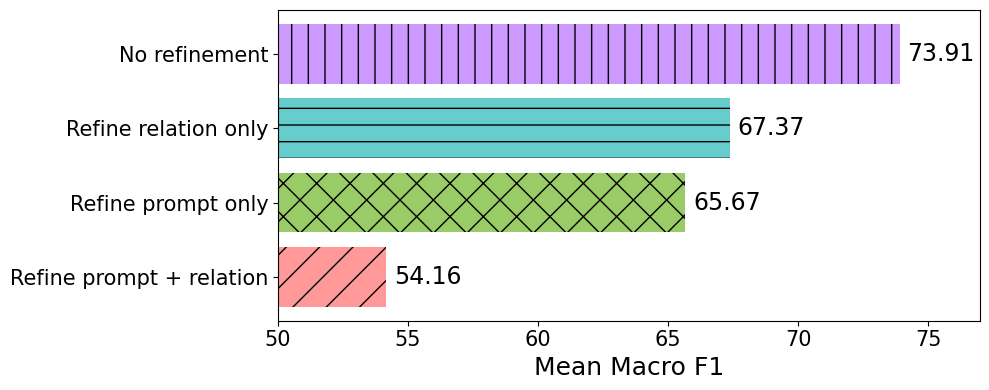

In [52]:
import matplotlib.pyplot as plt

# Data
categories = ['Refine prompt + relation', 'Refine prompt only', 'Refine relation only', 'No refinement']
f1_scores = [54.16, 65.67, 67.37, 73.91]
colors = ['#ff9999', '#99cc66', '#66cccc', '#cc99ff']
hatches = ['/', 'x', '-', '|']

# Increase figure size to accommodate long category names
fig, ax = plt.subplots(figsize=(10, 4))  

# Plot
bars = ax.barh(categories, f1_scores, color=colors)

# Add hatches
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
    bar.set_rasterized(True) 

# Add text annotations at the end of each bar
for bar in bars:
    ax.text(bar.get_width() + 0.3,  # Adding 0.3 to move text outside the bar
            bar.get_y() + bar.get_height() / 2,
            f'{bar.get_width():.2f}', va='center', ha='left', color='black', fontsize=17)

# Label and styling
plt.xlabel('Mean Macro F1', fontweight='light', fontsize=18)
plt.xlim(50, 77)

# Adjust y-tick labels font size
# ax.set_yticklabels(categories, fontsize=15)  # You can adjust the size

# Adjust ticks font size
ax.tick_params(axis='both', which='major', labelsize=15)


# Adjust layout
plt.tight_layout()  # Ensures everything fits into the figure neatly

plt.savefig('figs/refine-ablation-wiki-zsl.pdf', format='pdf', bbox_inches='tight', dpi=300)

# Show plot
plt.show()


## FewREL

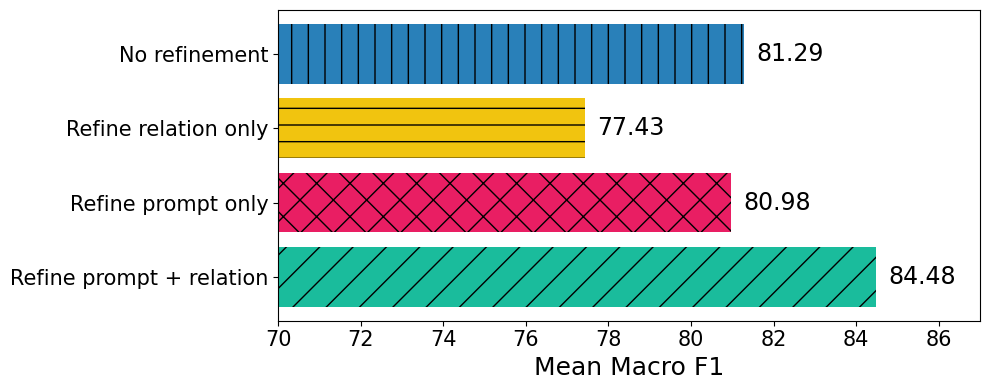

In [51]:
import matplotlib.pyplot as plt

# Data
categories = ['Refine prompt + relation', 'Refine prompt only', 'Refine relation only', 'No refinement']
f1_scores = [84.48, 80.98, 77.43, 81.29]
colors = ['#1abc9c', '#e91e63', '#f1c40f', '#2980b9'] 
hatches = ['/', 'x', '-', '|']

# Increase figure size to accommodate long category names
fig, ax = plt.subplots(figsize=(10, 4))  

# Plot
bars = ax.barh(categories, f1_scores, color=colors)

# Add hatches
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
    bar.set_rasterized(True) 

# Add text annotations at the end of each bar
for bar in bars:
    ax.text(bar.get_width() + 0.3,  # Adding 0.3 to move text outside the bar
            bar.get_y() + bar.get_height() / 2,
            f'{bar.get_width():.2f}', va='center', ha='left', color='black', fontsize=17)

# Label and styling
plt.xlabel('Mean Macro F1', fontweight='light', fontsize=18)
plt.xlim(70, 87)

# Adjust y-tick labels font size
# ax.set_yticklabels(categories, fontsize=15)  # You can adjust the size

# Adjust ticks font size
ax.tick_params(axis='both', which='major', labelsize=15)


# Adjust layout
plt.tight_layout()  # Ensures everything fits into the figure neatly

plt.savefig('figs/refine-ablation-few-rel.pdf', format='pdf', bbox_inches='tight', dpi=300)

# Show plot
plt.show()


## Random drop

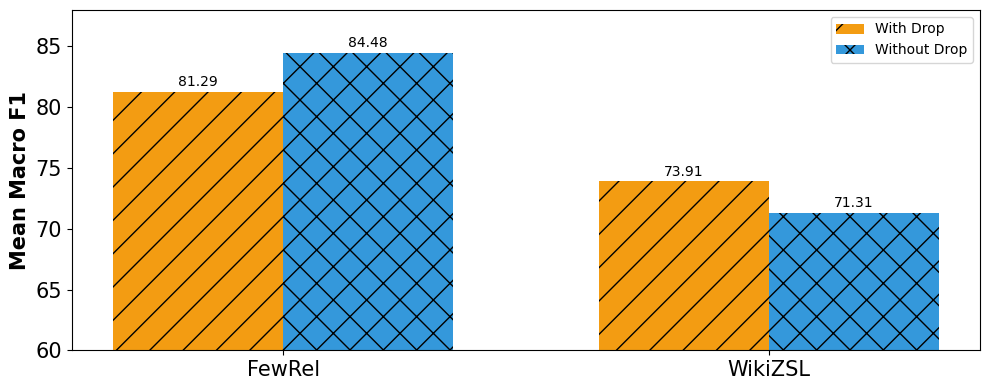

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data: Scores for two datasets under two conditions (with drop, without drop)
datasets = ['FewRel', 'WikiZSL']
with_drop = [81.29, 73.91]  # Scores for "with random drop"
without_drop = [84.48, 71.31]  # Scores for "without random drop"

# Bar width and position
bar_width = 0.35
index = np.arange(len(datasets))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 4))

# Plot bars for "with drop" and "without drop" conditions
bars1 = ax.bar(index, with_drop, bar_width, label='With Drop', color='#f39c12', hatch='/')
bars2 = ax.bar(index + bar_width, without_drop, bar_width, label='Without Drop', color='#3498db', hatch='x')

# Add text annotations
for bar in bars1:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
            f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)
    bar.set_rasterized(True) 
for bar in bars2:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
            f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)
    bar.set_rasterized(True) 

# Add labels, title, and legend
# ax.set_xlabel('Datasets', fontweight='bold', fontsize=12)
ax.set_ylabel('Mean Macro F1', fontweight='bold', fontsize=15)
# ax.set_title('Effect of Random Dropping on Two Datasets', fontweight='bold', fontsize=14)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(datasets)
ax.legend()

ax.tick_params(axis='both', which='major', labelsize=15)

# Tight layout and save
plt.ylim(60, 88)
plt.tight_layout()
plt.savefig('figs/random-drop-ablation.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()


In [ ]:
import spacy
from spacy.tokens import Span
from spacy import displacy

def visualize_relation(text, relations):
    nlp = spacy.blank("en")
    doc = nlp(text)

    # Manually set dependency relations to visualize relations
    for token in doc:
        token.dep_ = "dep"  # default to 'dep'

    spans = []
    # Calculate character offsets for each entity
    for rel in relations:
        head = Span(doc, rel['head_pos'][0], rel['head_pos'][1], label=rel['head_text'])
        tail = Span(doc, rel['tail_pos'][0], rel['tail_pos'][1], label=rel['tail_text'])

        doc.ents += (head, tail)

        # Mock dependencies
        head_root = head.root
        tail_root = tail.root

        head_root.dep_ = "rel"  # Relation type can be customized
        head_root.head = tail_root  # Point head to tail

    options = {"fine_grained": True}
    displacy.render(doc, style="dep", options=options, jupyter=True)

# Example data
text = "Binsey located in or next to body of water River Thames"
relations = [
    {'head_pos': [0, 1], 'tail_pos': [9, 11], 'head_text': 'Binsey', 'tail_text': 'River Thames', 'label': 'located in or next to body of water', 'score': 0.9235768914222717},
    # {'head_pos': [9, 11], 'tail_pos': [0, 1], 'head_text': 'River Thames', 'tail_text': 'Binsey', 'label': 'located in or next to body of water', 'score': 0.12615662813186646}
]

visualize_relation(text, relations)
